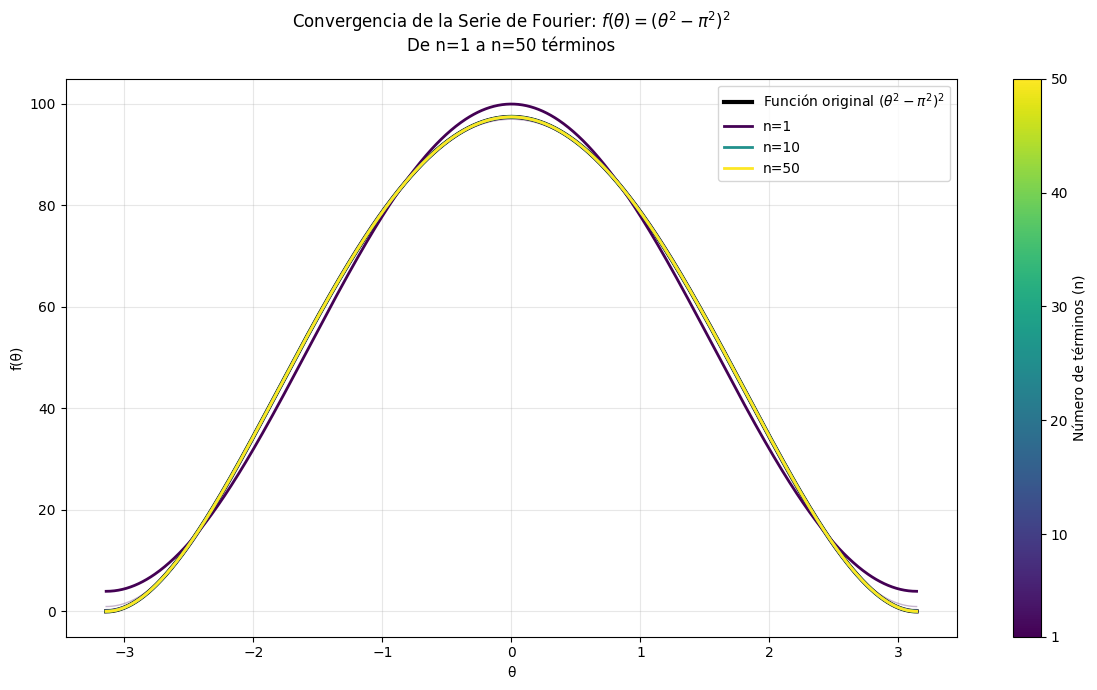

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

def original_function(theta):
    return (theta**2 - np.pi**2)**2

def fourier_approximation(theta, n_terms):
    a0 = 16*np.pi**4 / 15
    sum_terms = np.zeros_like(theta)
    for n in range(1, n_terms+1):
        sum_terms += 48*(-1)**(n+1) / n**4 * np.cos(n*theta)
    return a0/2 + sum_terms

# Configuración
theta = np.linspace(-np.pi, np.pi, 1000)
original = original_function(theta)
max_terms = 50

# Crear figura
plt.figure(figsize=(12, 7))

# Graficar función original
plt.plot(theta, original, 'k-', linewidth=3, label='Función original $(θ^2-π^2)^2$')

# Graficar aproximaciones con diferentes colores y transparencia
for n in range(1, max_terms+1):
    color = viridis(n/max_terms)  # Mapear n a un color en el espectro viridis
    approximation = fourier_approximation(theta, n)
    plt.plot(theta, approximation, color=color, alpha=0.3, linewidth=1)

# Destacar algunas aproximaciones específicas
highlight_terms = [1, 5, 10, 20, 50]
colors = plt.cm.viridis(np.linspace(0, 1, len(highlight_terms)))
for n, color in zip(highlight_terms, colors):
    approximation = fourier_approximation(theta, n)
    plt.plot(theta, approximation, color=color, linewidth=2, 
             label=f'n={n}' if n in [1, 10, 50] else "")

# Añadir barra de color para indicar número de términos
sm = plt.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=1, vmax=max_terms))
cbar = plt.colorbar(sm, ax=plt.gca(), label='Número de términos (n)')
cbar.set_ticks([1, 10, 20, 30, 40, 50])

# Configuración del gráfico
plt.title('Convergencia de la Serie de Fourier: $f(θ) = (θ^2-π^2)^2$\nDe n=1 a n=50 términos', pad=20)
plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()